## matplotlib.pyplot.stackplot

#### matplotlib.pyplot.stackplot(x, *args, labels=(), colors=None, baseline='zero', data=None, **kwargs)

Draw a stacked area plot.

#### Parameters:	
x : 1d array of dimension N
y : 2d array (dimension MxN), or sequence of 1d arrays (each dimension 1xN)
The data is assumed to be unstacked. Each of the following calls is legal:

    stackplot(x, y)               # where y is MxN
    
    stackplot(x, y1, y2, y3, y4)  # where y1, y2, y3, y4, are all 1xNm

baseline : {'zero', 'sym', 'wiggle', 'weighted_wiggle'}
Method used to calculate the baseline:

1. 'zero': Constant zero baseline, i.e. a simple stacked plot.
2. 'sym': Symmetric around zero and is sometimes called 'ThemeRiver'.
3. 'wiggle': Minimizes the sum of the squared slopes.
4. 'weighted_wiggle': Does the same but weights to account for size of each layer. It is also called 'Streamgraph'-layout. More details can be found at http://leebyron.com/streamgraph/.

labels : Length N sequence of strings
Labels to assign to each data series.

colors : Length N sequence of colors
A list or tuple of colors. These will be cycled through and used to colour the stacked areas.

**kwargs
All other keyword arguments are passed to Axes.fill_between().

#### Returns:	
list : list of PolyCollection
A list of PolyCollection instances, one for each element in the stacked area plot.

Stackplots are generated by plotting different datasets vertically on top of one another rather than overlapping with one another.

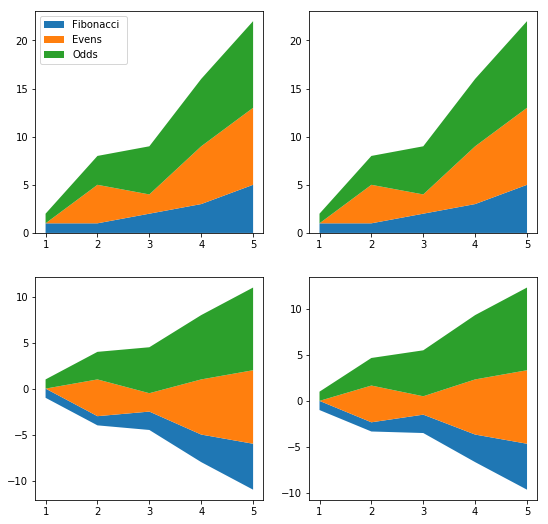

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots(2,2, figsize=(9, 9))
ax[0, 0].stackplot(x, y1, y2, y3, labels=labels)
ax[0, 0].legend(loc='upper left')

ax[0 ,1].stackplot(x, y, baseline='zero')
ax[1, 0].stackplot(x, y, baseline='sym')
ax[1, 1].stackplot(x, y, baseline='wiggle')

plt.show()

In [3]:
y

array([[1, 1, 2, 3, 5],
       [0, 4, 2, 6, 8],
       [1, 3, 5, 7, 9]])

#### Here we show an example of making a streamgraph using stackplot

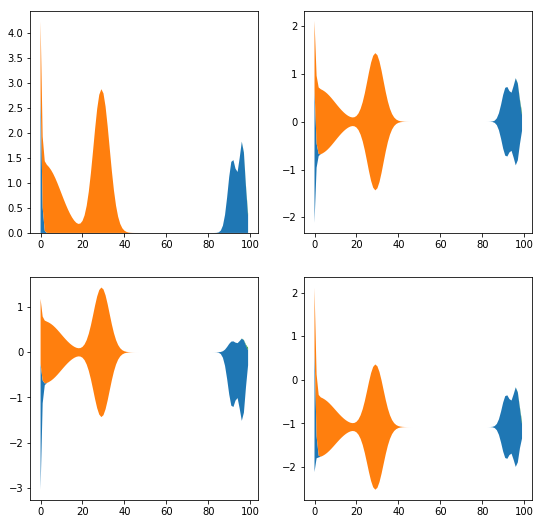

In [17]:
def layers(n, m):
    """
    Return *n* random Gaussian mixtures, each of length *m*.
    """
    def bump(a):
        x = 1 / (.1 + np.random.random())
        y = 2 * np.random.random() - .5
        z = 10 / (.1 + np.random.random())
        for i in range(m):
            w = (i / m - y) * z
            a[i] += x * np.exp(-w * w)
    a = np.zeros((m, n))
    for i in range(n):
        for j in range(5):
            bump(a[:, i])
    return a


d = layers(3, 100)

fig, ax = plt.subplots(2, 2, figsize=(9, 9))

ax[0, 0].stackplot(range(100), d.T, baseline='zero')
ax[0, 1].stackplot(range(100), d.T, baseline='sym')
ax[1, 0].stackplot(range(100), d.T, baseline='wiggle')
ax[1, 1].stackplot(range(100), d.T, baseline='weighted_wiggle') #It is also called Streamgraph'-layout.

plt.show()